In [5]:
# the simplest approach is to use (linear) ordinary least-squares regression (OLS)
import pandas as pd
import numpy as np
from urllib import urlretrieve
from sklearn import linear_model

In [7]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt

-rw-rw-r-- 1 okazkayasi 531406 Sep 10 17:49 ./data/es50.txt
-rw-rw-r-- 1 okazkayasi 688500 Sep 10 19:16 ./data/es.txt
-rw-rw-r-- 1 okazkayasi 363485 Sep 10 19:16 ./data/vs.txt


In [8]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

To make the data set easier to import, we do the following:
1. Generate a new text file.
2. Delete unneeded header lines.
3. Write an appropriate new header line to the new file.
4. Add a helper column, DEL (to catch the trailing semicolons).
5. Write all data rows to the new file.

In [9]:
new_file = open('./data/es50.txt', 'w')
# write the corrected third line of the original file
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [10]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [11]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es.head())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
1986-12-31,775.0,901.0,83.0,99.0,98.0,69.0,645.0,66.0,NaN
1987-01-01,775.0,901.0,83.0,99.0,98.0,69.0,645.0,66.0,NaN
1987-01-02,771.0,892.0,83.0,98.0,97.0,69.0,648.0,66.0,NaN
1987-01-05,772.0,898.0,83.0,99.0,98.0,69.0,650.0,66.0,NaN
1987-01-06,776.0,902.0,83.0,99.0,99.0,70.0,652.0,66.0,NaN


In [12]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [14]:
# read_csv using a url

cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', \
                 dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [15]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,\
                 parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [16]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))


In [24]:
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 266.7 KB


In [35]:
data.isnull().values.any()

False

            EUROSTOXX   VSTOXX
2016-09-28    2991.11  35.6846
2016-09-29    2991.58  35.6846
2016-09-30    3002.24  35.6846
2016-10-03    2998.50  35.6846
2016-10-04    3029.50  35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ba027de50>,
      dtype=object)

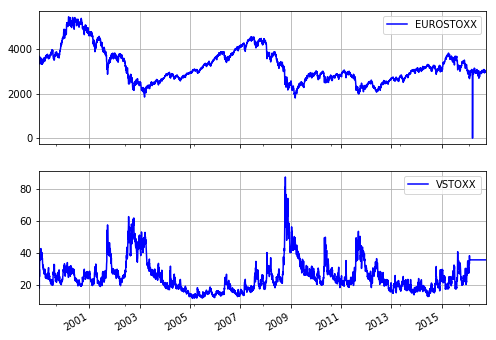

In [25]:
print data.tail()
data.plot(subplots=True, grid=True, style='b', figsize=(8,6))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


            EUROSTOXX    VSTOXX
1999-01-04        NaN       NaN
1999-01-05   0.017228  0.489248
1999-01-06   0.022138 -0.165317
1999-01-07  -0.015723  0.256337
1999-01-08  -0.003120  0.021570
            EUROSTOXX    VSTOXX
1999-01-05   0.017228  0.489248
1999-01-06   0.022138 -0.165317
1999-01-07  -0.015723  0.256337
1999-01-08  -0.003120  0.021570
1999-01-11  -0.019593  0.103173


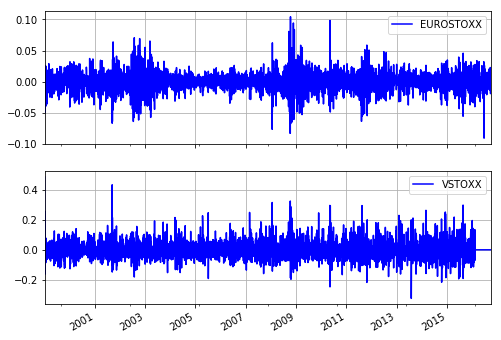

In [37]:
rets = np.log(data/ data.shift(1))
print rets.head()
rets = rets.ix[1:]
print rets.head()
rets.plot(subplots=True, grid=True, style='b', figsize=(8,6))
rets.fillna(method='ffill', inplace=True)

In [41]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
xdat = xdat.reset_index()
model = linear_model.LinearRegression()
model.fit(X=[xdat], y=ydat,sample_weight=None)

ValueError: cannot copy sequence with size 4553 to array axis with dimension 2

In [42]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


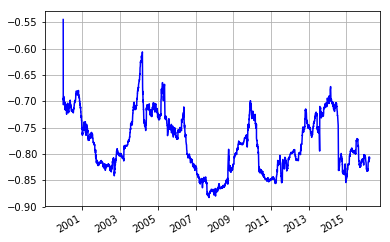

In [43]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b')